In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [4]:
train_dir = '/kaggle/input/the-wildfire-dataset'
val_dir = '/kaggle/input/the-wildfire-dataset'
test = '/kaggle/input/the-wildfire-dataset'

In [6]:
import os

base_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Check classes inside train_dir
classes = os.listdir(train_dir)
num_classes = len(classes)

print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')


Number of Classes: 2
Classes: ['nofire', 'fire']


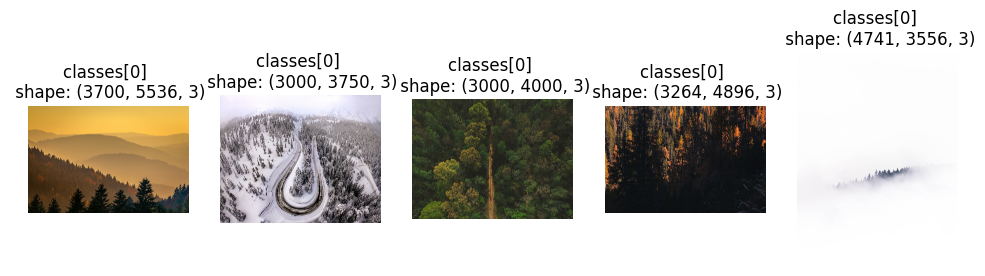

In [7]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, os.listdir(class_path)[i])
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'classes[0] \n shape: {img.shape}')
  plt.axis('off')
plt.show()

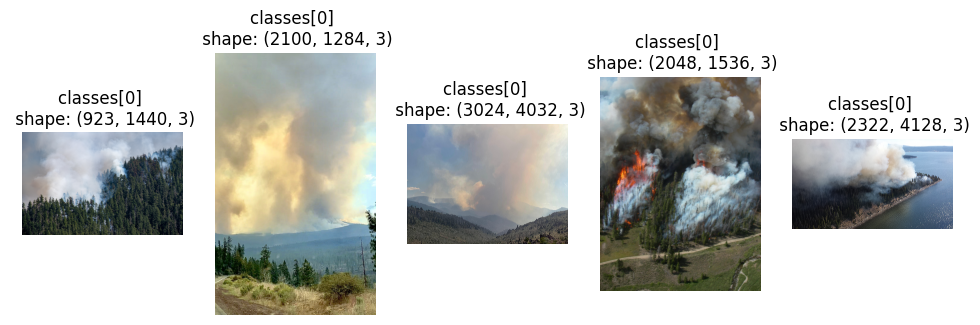

In [8]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, os.listdir(class_path)[i])
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'classes[0] \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [9]:
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [10]:
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [11]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 522s 9s/step - accuracy: 0.7551 - loss: 0.5131 - val_accuracy: 0.7135 - val_loss: 0.5251
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7188 - loss: 0.5480

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7188 - loss: 0.5480 - val_accuracy: 0.7161 - val_loss: 0.5148
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 495s 9s/step - accuracy: 0.7463 - loss: 0.5052 - val_accuracy: 0.7630 - val_loss: 0.4445
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9062 - loss: 0.2995 - val_accuracy: 0.7682 - val_loss: 0.4336
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 538s 9s/step - accuracy: 0.7985 - loss: 0.4322 - val_accuracy: 0.7917 - val_loss: 0.4047
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8438 - loss: 0.3551 - val_accuracy: 0.7969 - val_loss: 0.4148
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 494s 9s/step - accuracy: 0.8008 - loss: 0.4496 - val_accuracy: 0.7917 - val_loss: 0.4170
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8125 - loss: 0.3175 - val_accuracy: 0.7917 - val_loss: 0.4095
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 503s 9s/step - accuracy: 0.8121 - loss: 0.4286 - val_accuracy: 0.7786 - val_loss: 0.4507

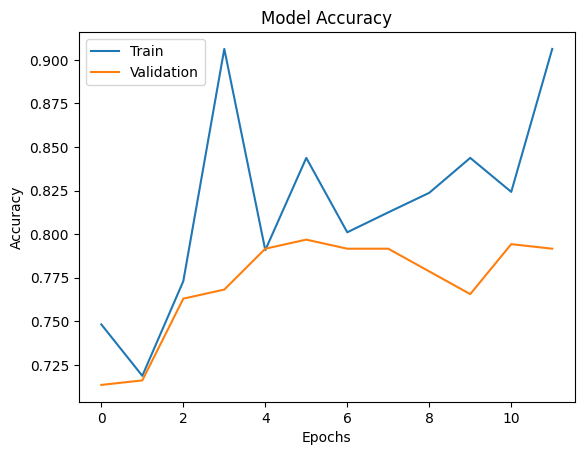

In [15]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

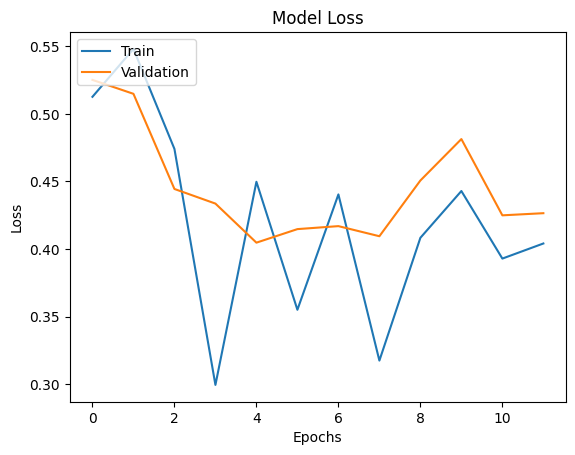

In [16]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:23 8s/step - accuracy: 0.8438 - loss: 0.4292

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 6/12 ━━━━━━━━━━━━━━━━━━━━ 52s 9s/step - accuracy: 0.8674 - loss: 0.3805

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.8496 - loss: 0.3870
Test Accuracy: 0.8307


In [18]:
# Save the model
model.save('FFD.keras')

In [19]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [21]:
os.listdir('/kaggle/input/the-wildfire-dataset')

['the_wildfire_dataset_2n_version']

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


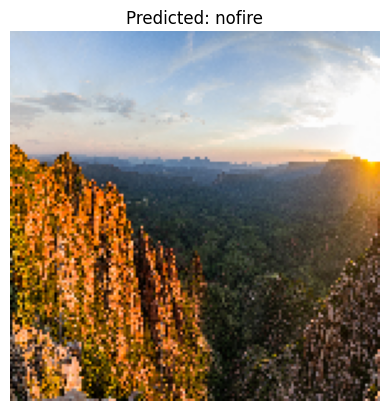

In [22]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/35554264024_b33afa21ac_o.jpg')